### Fundamental groups of combinatorially equivalente complexified real arrangements distinguished by their lower central series

In a paper in <a href="https://link.springer.com/article/10.1007/s00208-018-1673-0">Math. Ann.</a>, B. Guerville and J. Viu give families of line arrangements which define Zariski pairs distinguished by a link invariant (see also the <a href="https://arxiv.org/abs/1702.00922"> <kbd>arXiv</kbd></a> version); moreover, a simple way to compute this linking invariant is given. In a subsequent paper in <a href="https://www.tandfonline.com/doi/abs/10.1080/10586458.2018.1428131">Exp. Math.</a>, these authors together with E. Artal compute the fundamental groups for one of these pairs and prove they are not isomorphic (see also the <a href="https://arxiv.org/abs/1704.04152"> <kbd>arXiv</kbd></a> version). This notebook explains the computations. 


Let us define the line arrangements. They are projective arrangements which include the line at infinity $z=0$; we provide affine equations in the $(x,y)$-plane.

In [1]:
var('x,y')
eq1=[x + y + 1, x, y, x + y + 4/3, y + 4/3, -2*x + y + 2, y + 2, 2*x - 2, -x - 4/3, -1/5*x + 2/5*y - 2/5, 1/5*x + 2/5, 2/5*y - 2/5]
eq2=[x + y + 1, x, y, x + y + 4/3, y + 4/3, -2*x + y + 2, y + 2, 2*x - 2, -x - 4/3, 1/3*x + 2/3*y + 2/9, -1/3*x - 2/9, 2/3*y + 2/9]

Let us draw them.

In [2]:
def dibujo(L,a,b,c,d):
    P=sum(implicit_plot(_,(x,a,b),(y,c,d),color='red',linewidth=3) for _ in L[:3])
    Q1=sum(implicit_plot(_,(x,a,b),(y,c,d),color='black',linewidth=2) for _ in L[3:-3])
    Q2=sum(implicit_plot(_,(x,a,b),(y,c,d)) for _ in L[-3:])
    return P+Q1+Q2

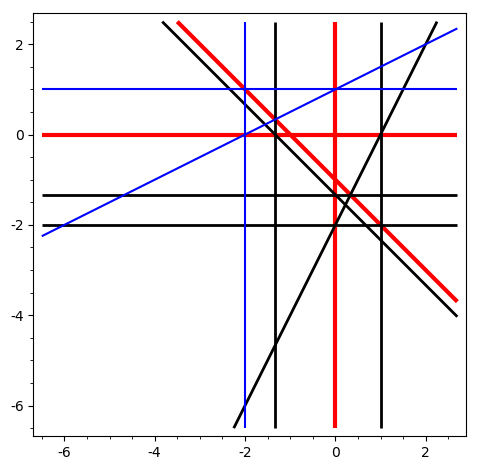

In [3]:
dibujo(eq1,-6.5,2.7,-6.5,2.5)

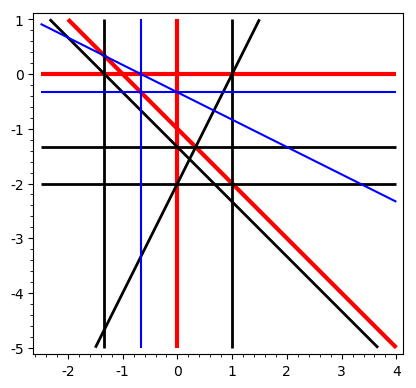

In [4]:
dibujo(eq2,-2.5,4,-5,1)

We introduce a `GAP` package and a `GAP` function for the computations of the LCS.

In [5]:
libgap.LoadPackage('nq')
LCF = libgap.function_factory("LowerCentralFactors")

We consider the braid monodromies of the vertical projections of the above pictures. Since some vertical lines belong to the arrangements, the braid monodromies are not generic but they serve to the computation of the fundamental groups.

Since there are $8$ non-vertical lines, braid monodromies will live in $\mathbb{B}_8$.

In [6]:
B=BraidGroup(8)

Let us explain the following cells. 
The list `cruces1` reflects the first picture (without the vertical lines. Each list in `cruces1` encodes the multiple points in the non-transversal vertical lines. They are ordered from left to right. The fundamental group of the generic vertical lines is $\mathbb{F}_{8}$. 
Each entry of `cruces1` encodes the Tietze word in the Artin system of generators (ordered from above to below) of the braid associated to half a tour around the non-transversal vertical lines. This way the first `[6]` means that the braid associated to the first half-tour is~$\sigma_6$; hence the braid of the whole tour, starting at a vertical line with $x$-coordinate slightly smaller that the one of the first non-transversal vertical line is $\sigma_6^2$.
The list `cruces2`reflects the same thing for the second picture.

In [7]:
cruces1=[[6],[5],[2],[1,4],[3],[2,4],[3],[1,5,7],[6],[4,5,4],[7],[3,6],[2],[1]]
cruces2=[[2],[1,3],[4],[2],[1,3],[2,5,7],[6],[4,5,4],[7],[3],[2],[1,6],[4],[5]]

Let us explain now the list `vert1`; it adds a label to each non-transversal vertical line. This label is $0$ if the corresponding non-transversal vertical line is not in the arrangement. If it is we apply an increasing integer label starting from one. For example, in the first picture, the vertical lines in the arrangement are in positions $4,6,8,12$.

In [8]:
vert1=3*[0]+[1,0,2,0,3]+3*[0]+[4]+2*[0]
vert2=[0,1]+2*[0]+[2,3]+5*[0]+[4]+2*[0]

The next step is the construction of the braid monodromy. Each braid is of the form $                 \tau=\alpha\beta\alpha^{-1}$. The braid $\alpha$ is the product of the previous half tours (corresponding to a path from a base point (a real point $x_0\ll 0$) to a point with $x$-coordinate real and slightly smaller than the one of the non-transversal vertical line. This path goes through the negative imaginary-part half complex line. The braid $\beta$ is the local whole tour.

In [9]:
mon1=[]
ini=B.one()
for l in cruces1:
    a=B(l)
    mon1.append(ini*a^2/ini)
    ini=ini*a
mon2=[]
ini=B.one()
for l in cruces2:
    a=B(l)
    mon2.append(ini*a^2/ini)
    ini=ini*a

Fundamental groups are computed as follows. We consider the fundamental group $\mathbb{F}_{12}$; the first eight generators are meridians of the non-vertical lines, while the last ones are meridians of the vertical lines. The relations are given as follows. For each generator $g_i$ of $\mathbb{F}_{12}$, $1\leq i\leq 8$ we add the relation $v^{ -1} g_i v=g_i^{\tau_i}$, where $v$ is trivial if the vertical line is not in the arrangement and one of the last generators if it is.

In [10]:
F=FreeGroup(12)
rlk1=[]
aux=zip(mon1,vert1)
for s,e in aux:
    for p in F.gens()[:8]:
        if e==0:
            v=F.one()
        else:
            v=F.gen(7+e)
        rlk1.append(v^-1*p*v/(p*s))
rlk2=[]
aux=zip(mon2,vert2)
for s,e in aux:
    for p in F.gens()[:8]:
        if e==0:
            v=F.one()
        else:
            v=F.gen(7+e)
        rlk2.append(v^-1*p*v/(p*s))
g1=(F/rlk1).simplified()
g2=(F/rlk2).simplified()

W compute the graduate of the lower central series using `GAP` up to level $4$.

In [11]:
%time L1=libgap.LowerCentralFactors(g1,4).sage()
%time L2=libgap.LowerCentralFactors(g2,4).sage()

CPU times: user 180 ms, sys: 904 µs, total: 181 ms
Wall time: 5.53 s
CPU times: user 275 ms, sys: 890 µs, total: 276 ms
Wall time: 6.4 s


The next cells allow to compute the first graduate terms. The three first ones are torsion-free and coincide for the two groups. In the fourth one, the free parts coincide but the first one has $2$-torsion while the second one not, and the groups are not isomorphic.

In [12]:
[len(_) for _ in L1],[len(_) for _ in L2]

([12, 23, 76, 212], [12, 23, 76, 211])

In [13]:
[Set(_) for _ in L1],[Set(_) for _ in L2]

([{0}, {0}, {0}, {0, 2}], [{0}, {0}, {0}, {0}])

In [14]:
L1[-1].count(2)

1